<a href="https://colab.research.google.com/github/danielamattos/Projetos---Master-Data-Decision-Science/blob/main/Atividade_Teste_de_Hip%C3%B3tese.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Teste de Hipótese para a Média (uma variável)

### Atividade 1: Crie um dataframe a partir do banco de dados `basedosdados.br_inep_ideb.municipio` disponível em [Ideb](https://basedosdados.org/dataset/br-inep-ideb?bdm_table=municipio). Selecione apenas as colunas `ano`, `sigla_uf`, `taxa_aprovacao`, `nota_saeb_matematica`, `nota_saeb_lingua_portuguesa` e `ideb`.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# seu código
import pandas as pd

df_ideb = pd.read_csv('/content/drive/MyDrive/sirius/ideb (1).csv')
    
df= df_ideb[['ano', 'sigla_uf','taxa_aprovacao','nota_saeb_matematica','nota_saeb_lingua_portuguesa','ideb']]

df.head()

,ano,sigla_uf,taxa_aprovacao,nota_saeb_matematica,nota_saeb_lingua_portuguesa,ideb
0,2005,AC,64.1,161.8,150.80,2.4
1,2005,AC,53.9,167.8,165.60,2.3
2,2005,AC,49.3,151.8,149.60,1.8
3,2005,AC,48.8,163.6,155.80,1.9
4,2005,AC,48.8,159.0,153.39,1.9


In [ ]:
# seu código


In [ ]:
# seu código

### Atividade 2: Verifique quantas linhas e colunas possui esse dataframe. Veja também se há dados faltantes.

In [ ]:
# seu código
df.shape

(130194, 6)

In [ ]:
# seu código
print(df.isnull().sum())

ano                                0
sigla_uf                           0
taxa_aprovacao                 26736
nota_saeb_matematica           41849
nota_saeb_lingua_portuguesa    41849
ideb                           29825
dtype: int64


In [ ]:
# seu código

### Atividade 3: Teste a hipótese de a média da taxa de aprovação para o ano de 2005 ser igual a 78. Considere um nível de confiança de 95%.

Descreva, sucintamente, o resultado do teste de hipótese. Não esqueça de incluir as estatísticas encontradas.

Dica: crie um DataFrame somente com os valores do ano e da variável de interesse.


In [ ]:
# seu código

df_ano = df[['ano','taxa_aprovacao']]

df_2005 = df_ano[df_ano['ano'] == 2005]

df_2005.head()

,ano,taxa_aprovacao
0,2005,64.1
1,2005,53.9
2,2005,49.3
3,2005,48.8
4,2005,48.8


In [ ]:
# seu código

from scipy.stats import ttest_1samp

ttest_1samp(a=df_2005['taxa_aprovacao'], popmean=78, nan_policy = 'omit', alternative='two-sided')



Ttest_1sampResult(statistic=20.890080427394516, pvalue=3.146950806710318e-95)

O pvalor deu menor do que o nível de significância, dessa forma podemos assumir com 95% de confiança de que a média da taxa de aprovação do ano de 2005 não é igual a 78.

# Teste de Hipótese para a Média (duas variáveis independentes)

Agora vamos aplicar um teste de hipótese para a média de duas populações independentes usando dados reais. Desejamos saber se a média para ambas é a mesma.

### Atividade 4: Teste a hipótese de a média do IDEB para os estados do Rio Grande do Sul e do Ceará, no ano de 2019, serem iguais. Considere um nível de confiança de 95%

Dica: Primeiro crie um dataframe auxiliar contendo apenas os dados referentes a 2019. Depois selecione dois conjunto de valores de IDEB, um apenas para o estado do Rio Grande do Sul e outro apenas para o estado do Ceará.

In [ ]:
# seu código

df= df_ideb[['ano', 'sigla_uf','ideb']]

df_2019= df[df['ano'] == 2019]

df_2019.head()

,ano,sigla_uf,ideb
3409,2019,AC,8.1
3410,2019,AL,8.9
3411,2019,AL,8.9
3412,2019,AL,8.1
3413,2019,AL,8.1


In [ ]:

from scipy.stats import ttest_ind

ttest_ind(df_2019['ideb'][df_2019['sigla_uf'] == 'RS'],df_2019['ideb'][df_2019['sigla_uf'] == 'CE'], nan_policy = 'omit')

Ttest_indResult(statistic=-4.320050871966293, pvalue=1.6632800256887865e-05)

O pvalor deu menor do que o nível de significância, dessa forma podemos assumir com 95% de confiança de que a média do IDEB dos estados do Ceará e Rio Grande do Sul no ano de 2019 não são iguais.

### Atividade 5: Com base no resultado do teste anterior, faça um boxplot que lhe ajude a entender melhor os resultados obtidos. Isto é, compare o boxplot do IDEB dos dois estados.

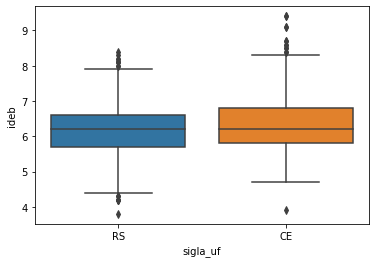

In [ ]:
# seu código

df_RS = df_2019[df_2019['sigla_uf'] == 'RS']
df_CE = df_2019[df_2019['sigla_uf'] == 'CE']

import seaborn as sns 

df_estados = pd.concat([df_RS,df_CE])

sns.boxplot(x= df_estados['sigla_uf'], y= df_estados['ideb']);

Analisando o boxplot do IDEB dos dois estados, é possível notar que apesar da mediana ser próxima para os dois estados,o estado do Ceará possui outliers com valores altos e que puxam a média para cima, enquanto o Rio Grande do Sul possui outliers com valores mais baixos e que puxam a média para baixo. 

### Atividade 6: Teste a hipótese de a média do IDEB para os anos de 2005 e 2019 serem iguais. Considere um nível de confiança de 95%

Dica: Crie dois dataframes auxiliares e selecione 300 linhas de cada um apenas (sem conter valores faltantes) para realizar o teste.

In [ ]:
# seu código

df=df_ideb[['ano','ideb']]

df_2005= df[df['ano']==2005].dropna()
df_2019= df[df['ano']==2019].dropna()

df_2005= df_2005.head(300)
df_2019= df_2019.head(300)

from scipy.stats import ttest_rel

ttest_rel(df_2005['ideb'],df_2019['ideb'])


Ttest_relResult(statistic=-163.87518962388705, pvalue=8.329734374233758e-295)

O pvalor deu menor do que o nível de significância, dessa forma podemos assumir com 95% de confiança de que a média do IDEB nos anos de 2005 e 2019 não são iguais.

### Atividade 7: Com base no resultado do teste anterior, faça um boxplot que lhe ajude a entender melhor os resultados obtidos. Isto é, compare o boxplot do IDEB para os dois anos.

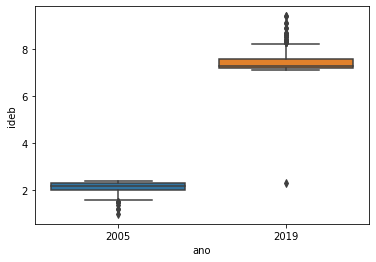

In [ ]:
# seu código

df_ano = pd.concat([df_2005,df_2019])

sns.boxplot(x= df_ano['ano'], y= df_ano['ideb']);

A partir do boxplot, é possível notar que a maior parte dos valores do IDEB de 2019 são maiores do que os valores do IDEB de 2005, o que indica que a média de 2019 é maior do que a média de 2005.

# Análise de Variância (ANOVA) One-Way

### Atividade 8: Vamos comparar a média do IDEB para os três estados da região sul, em 2019, para ver se estas médias podem ser consideradas iguais. Considere um nível de confiança de 95%.

Dica: Crie três dataframes auxiliares, um para cada estado.

In [ ]:
# seu código

df= df_ideb[['ano','sigla_uf','ideb']]

df_ano= df[df['ano']==2019]

df_RS= df_ano[df_ano['sigla_uf'] == 'RS'].dropna()
df_SC= df_ano[df_ano['sigla_uf'] == 'SC'].dropna()
df_PR= df_ano[df_ano['sigla_uf'] == 'PR'].dropna()

from scipy.stats import f_oneway

f_oneway(df_RS['ideb'],df_SC['ideb'],df_PR['ideb'])

F_onewayResult(statistic=27.712354138245196, pvalue=1.2331589284254783e-12)

O pvalor deu menor do que o nível de significância, dessa forma podemos assumir com 95% de confiança de que a média do IDEB para os três estados da Região Sul no ano de 2019 não são iguais.

### Atividade 9: Faça um boxplot para entender melhor o que está acontecendo com os valores do IDEB para os três estados.

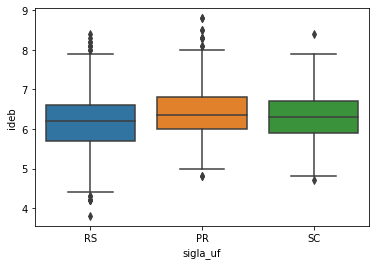

In [ ]:
# seu código

df_estados= pd.concat([df_RS,df_PR,df_SC])
sns.boxplot(x= df_estados['sigla_uf'], y= df_estados['ideb']);

Analisando o boxplot, é possível notar que apesar das medianas dos três estados serem próximas, o estado do Paraná possui uma mediana mais alta e um número considerável de outliers com valores mais altos também, o que indica que a média do IDEB do Paraná é mais alta. O estado do Rio Grande do Sul, apesar de ter outliers com valores mais altos em relação a Santa Catarina, também possui outliers com valores menores e um primeiro quartil maior também, que indicam uma média menor.

### Atividade 10: Faça um teste Post-hoc para verificar se de fato é o estado de Santa Catarina tem média diferente dos demais estados.

In [ ]:
# seu código

from statsmodels.stats.multicomp import pairwise_tukeyhsd

print(pairwise_tukeyhsd(endog = df_estados['ideb'], groups = df_estados['sigla_uf'], alpha = 0.05))

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
    PR     RS  -0.2294  0.001  -0.302 -0.1568   True
    PR     SC  -0.1123 0.0035 -0.1936  -0.031   True
    RS     SC   0.1171  0.001  0.0414  0.1928   True
----------------------------------------------------


A partir do teste de tuckey, é possível assumir com 95% de confiança de que as médias do IDEB dos três estados da Região Sul são diferentes entre si.